University Rankings Based on AHP:
  University     Score
0      KazNU  0.607317
2         NU  0.366392
1       KBTU  0.366172
6     KazNPU  0.306042
5   Satbayev  0.291504
4        ENU  0.285563
7        ATU  0.268919
3        SDU  0.261198


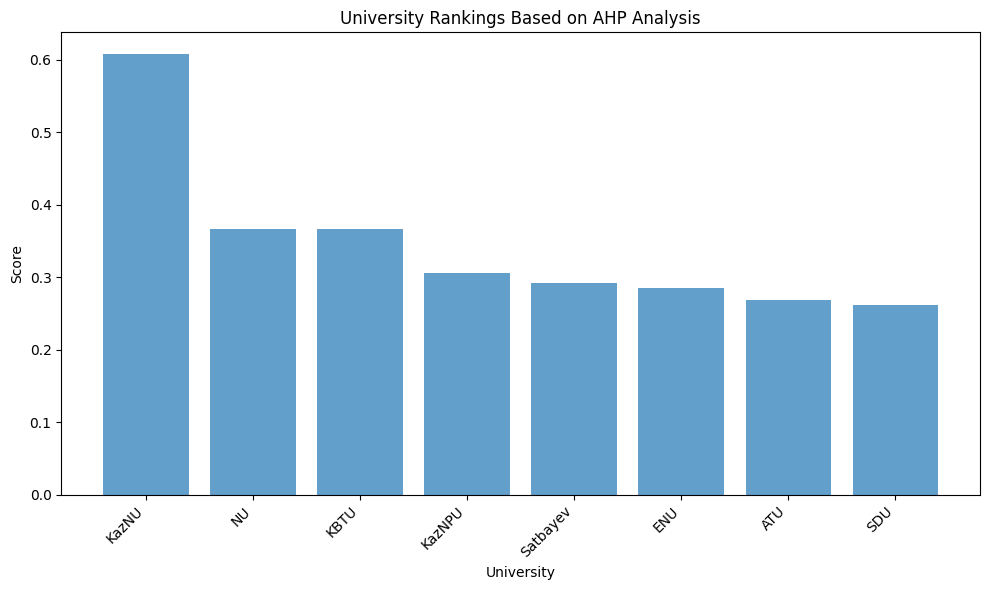

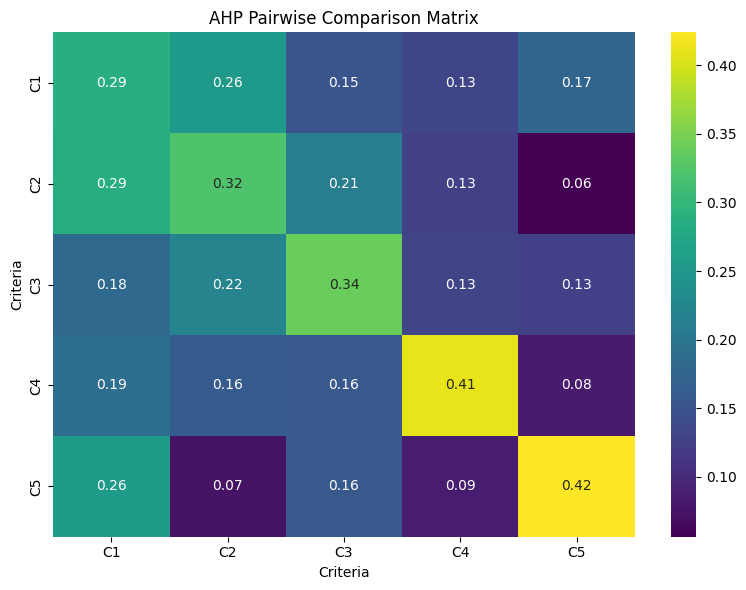

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_orig_path = 'data.csv'  # Replace with your file path
data_normalized_path = 'Normalization_data.csv'  # Replace with your file path

data_orig = pd.read_csv(data_orig_path)
data_normalized = pd.read_csv(data_normalized_path)

# Extract the normalized data excluding the university names
normalized_data = data_normalized.iloc[:, 1:].values
universities = data_normalized['University'].values

# Define the criteria weights (equal importance as default assumption)
num_criteria = normalized_data.shape[1]
weights = np.array([1/num_criteria] * num_criteria)

# Compute the weighted normalized matrix
weighted_matrix = normalized_data * weights

# Calculate the overall score for each university
scores = weighted_matrix.sum(axis=1)

# Rank universities based on scores
ranking = pd.DataFrame({
    'University': universities,
    'Score': scores
}).sort_values(by='Score', ascending=False)

# Save or print the ranking
print("University Rankings Based on AHP:")
print(ranking)

# Plot the rankings
plt.figure(figsize=(10, 6))
plt.bar(ranking['University'], ranking['Score'], alpha=0.7)
plt.title('University Rankings Based on AHP Analysis')
plt.xlabel('University')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create the pairwise comparison matrix (example matrix, as no specific criteria weights were provided)
matrix_size = normalized_data.shape[1]  # Number of criteria
ahp_matrix = np.random.rand(matrix_size, matrix_size)
np.fill_diagonal(ahp_matrix, 1)

# Symmetrize the matrix to make it consistent
ahp_matrix = (ahp_matrix + ahp_matrix.T) / 2

# Normalize the rows
row_sums = ahp_matrix.sum(axis=1, keepdims=True)
normalized_ahp_matrix = ahp_matrix / row_sums

# Create a heatmap to represent the AHP pairwise comparison matrix
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_ahp_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("AHP Pairwise Comparison Matrix")
plt.xlabel("Criteria")
plt.ylabel("Criteria")
plt.xticks(ticks=np.arange(matrix_size) + 0.5, labels=[f"C{i+1}" for i in range(matrix_size)])
plt.yticks(ticks=np.arange(matrix_size) + 0.5, labels=[f"C{i+1}" for i in range(matrix_size)])
plt.tight_layout()
plt.show()